In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data =pd.read_csv('C:/Users/saksh/Desktop/Personal Projects/Mental Health/clean.csv')


In [4]:
#rows and columns
data.shape

(1252, 27)

In [6]:
data.info()
#this should have no null values as we already imputed those in the data cleaning process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 27 columns):
Unnamed: 0                   1252 non-null int64
Timestamp                    1252 non-null object
Age                          1252 non-null int64
Gender                       1252 non-null object
self_employed                1252 non-null object
family_history               1252 non-null object
treatment                    1252 non-null object
work_interfere               1252 non-null object
no_employees                 1252 non-null int64
remote_work                  1252 non-null object
tech_company                 1252 non-null object
benefits                     1252 non-null object
care_options                 1252 non-null object
wellness_program             1252 non-null object
seek_help                    1252 non-null object
anonymity                    1252 non-null object
leave                        1252 non-null int64
mental_health_consequence    1252 non-null obje

In [7]:

#to see the diff types of values
data.dtypes


Unnamed: 0                    int64
Timestamp                    object
Age                           int64
Gender                       object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                  int64
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                         int64
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
Gender_bin                   object
dtype: object

In [9]:
data["treatment"]
#to summarize the content
data["treatment"].value_counts()
#the data is so beautifully balanced :) such a delight

Yes    633
No     619
Name: treatment, dtype: int64

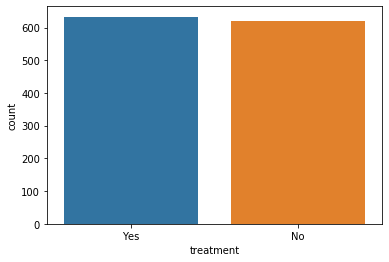

In [10]:
data["treatment"].value_counts(normalize=True)*100
#to visualize the outcome variable
sns.countplot(data["treatment"])


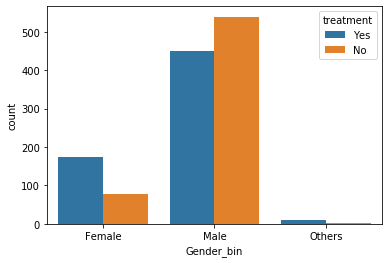

In [12]:
sns.countplot(x="Gender_bin",hue="treatment",data=data)
#this shows that on an average Females and others are more likely to suffer from Mental disorders

In [14]:
# Clearly Other genders and females have a hard time here.
pd.crosstab(data["treatment"],data[("Gender_bin")]).apply(lambda r: r/r.sum(), axis=0)


Gender_bin,Female,Male,Others
treatment,,,
No,0.310757,0.545547,0.153846
Yes,0.689243,0.454453,0.846154


In [15]:
data.describe()
#there doesnt seem to be any outliers except "Age". Lets just remove that row.


,Unnamed: 0,Age,no_employees,leave
count,1252.000000,1252.000000,1252.000000,1252.000000
mean,628.373003,32.313898,3.837061,1.194888
std,363.611597,11.112809,2.149631,1.311709
min,0.000000,18.000000,1.000000,0.000000
25%,313.750000,27.000000,2.000000,0.000000
50%,627.500000,31.000000,3.000000,1.000000
75%,942.250000,36.000000,6.000000,2.000000
max,1258.000000,329.000000,7.000000,4.000000


In [17]:
data2 = data.drop(data[(data.Age == 329)].index)

In [18]:
data2.describe()
#looks good now.

,Unnamed: 0,Age,no_employees,leave
count,1251.000000,1251.000000,1251.000000,1251.000000
mean,628.584333,32.076739,3.838529,1.195843
std,363.680086,7.288272,2.149862,1.311798
min,0.000000,18.000000,1.000000,0.000000
25%,313.500000,27.000000,2.000000,0.000000
50%,628.000000,31.000000,3.000000,1.000000
75%,942.500000,36.000000,6.000000,2.000000
max,1258.000000,72.000000,7.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B9612B320>,
      dtype=object)

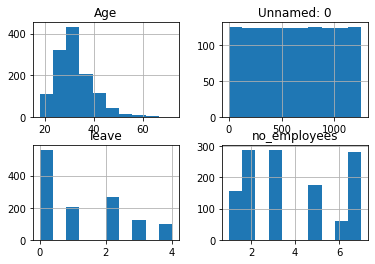

In [19]:
data2.hist()


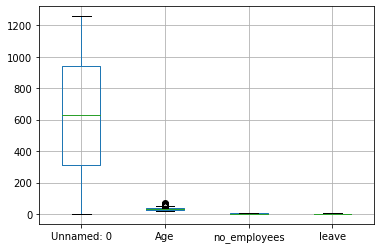

In [20]:
data2.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B96384240>,
      dtype=object)

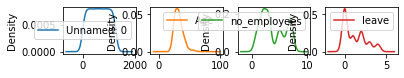

In [21]:
data2.plot(kind="density", subplots=True, layout=(4,4),sharex=False)


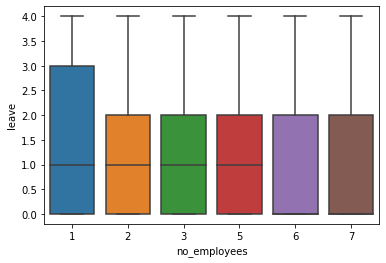

In [25]:
sns.boxplot(x="no_employees",y="leave",data=data2)

#'1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4,
#                                 '100-500': 5, '500-1000': 6, 'More than 1000': 7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B9692C6A0>,
      dtype=object)

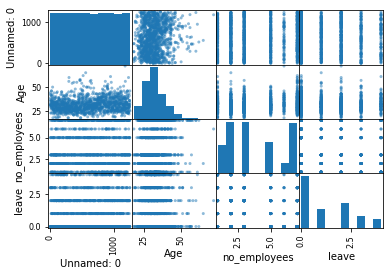

In [26]:
from pandas.plotting import  scatter_matrix
scatter_matrix(data2)


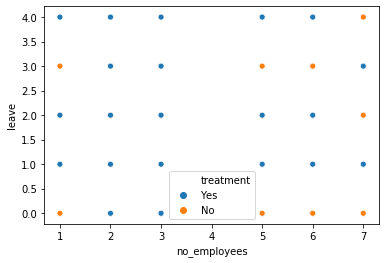

In [28]:
sns.scatterplot(x="no_employees",y="leave",hue="treatment",data=data2)
#lower leave may be responsible for mental disorders( pretty intuitive)

In [29]:
correlations= data2.corr()
correlations

#lets encode the categorical variables and do some more EDA

,Unnamed: 0,Age,no_employees,leave
Unnamed: 0,1.000000,0.118369,0.032083,-0.001587
Age,0.118369,1.000000,0.123481,0.021354
no_employees,0.032083,0.123481,1.000000,-0.131464
leave,-0.001587,0.021354,-0.131464,1.000000


In [30]:
data2["family_history"] = data2["family_history"].astype('category')
data2["treatment"] = data2["treatment"].astype('category')
data2["work_interfere"] = data2["work_interfere"].astype('category')
data2["remote_work"] = data2["remote_work"].astype('category')
data2["tech_company"] = data2["tech_company"].astype('category')
data2["benefits"] = data2["benefits"].astype('category')
data2["care_options"] = data2["care_options"].astype('category')
data2["wellness_program"] = data2["wellness_program"].astype('category')
data2["seek_help"] = data2["seek_help"].astype('category')
data2["anonymity"] = data2["anonymity"].astype('category')
data2["mental_health_consequence"] = data2["mental_health_consequence"].astype('category')
data2["phys_health_consequence"] = data2["phys_health_consequence"].astype('category')
data2["coworkers"] = data2["coworkers"].astype('category')
data2["supervisor"] = data2["supervisor"].astype('category')
data2["mental_health_interview"] = data2["mental_health_interview"].astype('category')
data2["phys_health_interview"] = data2["phys_health_interview"].astype('category')
data2["mental_vs_physical"] = data2["mental_vs_physical"].astype('category')
data2["obs_consequence"] = data2["obs_consequence"].astype('category')




data2.dtypes

Unnamed: 0                      int64
Timestamp                      object
Age                             int64
Gender                         object
self_employed                  object
family_history               category
treatment                    category
work_interfere               category
no_employees                    int64
remote_work                  category
tech_company                 category
benefits                     category
care_options                 category
wellness_program             category
seek_help                    category
anonymity                    category
leave                           int64
mental_health_consequence    category
phys_health_consequence      category
coworkers                    category
supervisor                   category
mental_health_interview      category
phys_health_interview        category
mental_vs_physical           category
obs_consequence              category
comments                       object
Gender_bin  

In [54]:
#data2=data2.drop(['Gender'], axis=1)
data2.head()
print(data2.columns)
#data2=data2.drop(['work_intefere_cat'],axis=1)


Index(['Age', 'self_employed', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Gender_bin',
       'family_hist_cat'],
      dtype='object')


In [62]:
data2["self_employed"] = data2["self_employed"].astype('category')
data2.dtypes
data2["self_employed_cat"] = data2["self_employed"].cat.codes
data2.head()


,Age,self_employed,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender_bin,family_hist_cat,self_employed_cat
0,37,Unknown,1,Often,2,0,Yes,Yes,Unknown,No,...,Unknown,Yes,No,Unknown,Yes,No,Unknown,Female,0,1
1,44,Unknown,0,Rarely,7,0,No,Unknown,No,Unknown,...,No,No,No,No,Unknown,No,Unknown,Male,0,1
2,32,Unknown,0,Rarely,2,0,Yes,No,No,No,...,Yes,Yes,Yes,Yes,No,No,Unknown,Male,0,1
3,31,Unknown,1,Often,3,0,Yes,No,Yes,No,...,Unknown,No,Unknown,Unknown,No,Yes,Unknown,Male,1,1
4,31,Unknown,0,Never,5,1,Yes,Yes,No,Unknown,...,Unknown,Yes,Yes,Yes,Unknown,No,Unknown,Male,0,1


In [ ]:
data2["self_employed_cat"] = data2["self_employed"].cat.codes

In [68]:
data2["tech_company_cat"] = data2["tech_company"].cat.codes
data2["benefits_cat"] = data2["benefits"].cat.codes
data2["care_options_cat"] = data2["care_options"].cat.codes
data2["wellness_program_cat"] = data2["wellness_program"].cat.codes
data2["seek_help_cat"] = data2["seek_help"].cat.codes
data2["anonymity_cat"] = data2["anonymity"].cat.codes
data2["mental_health_consequence_cat"] = data2["mental_health_consequence"].cat.codes
data2["phys_health_consequence_cat"] = data2["phys_health_consequence"].cat.codes
data2["coworkers_cat"] = data2["coworkers"].cat.codes
data2["supervisor_cat"] = data2["supervisor"].cat.codes
data2["mental_health_interview_cat"] = data2["mental_health_interview"].cat.codes

data2["phys_health_interview_cat"] = data2["phys_health_interview"].cat.codes

data2["mental_vs_physical_cat"] = data2["mental_vs_physical"].cat.codes

data2["obs_consequence_cat"] = data2["obs_consequence"].cat.codes




In [72]:
print(data2.columns)


Index(['Age', 'self_employed', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Gender_bin',
       'family_hist_cat', 'self_employed_cat', 'tech_company_cat',
       'benefits_cat', 'care_options_cat', 'wellness_program_cat',
       'seek_help_cat', 'anonymity_cat', 'mental_health_consequence_cat',
       'phys_health_consequence_cat', 'coworkers_cat', 'supervisor_cat',
       'mental_health_interview_cat', 'phys_health_interview_cat',
       'mental_vs_physical_cat', 'obs_consequence_cat'],
      dtype='object')


In [41]:
# we use one hot encoding for work_interfere
pd.get_dummies(data2, columns=["work_interfere"]).head()

#putting the numerical attributes for work_intefere cat can be counterintuitive since this kind of encoding can fool algorithms
#hence we should use dummy variables for work_intefere

,Unnamed: 0,Timestamp,Age,Gender,self_employed,treatment,no_employees,remote_work,tech_company,benefits,...,obs_consequence,comments,Gender_bin,family_hist_cat,work_intefere_cat,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,work_interfere_Unknown
0,0,8/27/2014 11:29,37,Female,Unknown,1,2,0,Yes,Yes,...,No,Unknown,Female,0,1,0,1,0,0,0
1,1,8/27/2014 11:29,44,M,Unknown,0,7,0,No,Unknown,...,No,Unknown,Male,0,2,0,0,1,0,0
2,2,8/27/2014 11:29,32,Male,Unknown,0,2,0,Yes,No,...,No,Unknown,Male,0,2,0,0,1,0,0
3,3,8/27/2014 11:29,31,Male,Unknown,1,3,0,Yes,No,...,Yes,Unknown,Male,1,1,0,1,0,0,0
4,4,8/27/2014 11:30,31,Male,Unknown,0,5,1,Yes,Yes,...,No,Unknown,Male,0,0,1,0,0,0,0


In [77]:
data2["work_interfere_cat"] = data2["work_interfere"].cat.codes

In [79]:
data2.to_csv("C:/Users/saksh/Desktop/Personal Projects/Mental Health/finaldata.csv")